Accuracy: 0.8933333333333333
Confusion Matrix: [[15  1  1]
 [ 2 35  0]
 [ 4  0 17]]


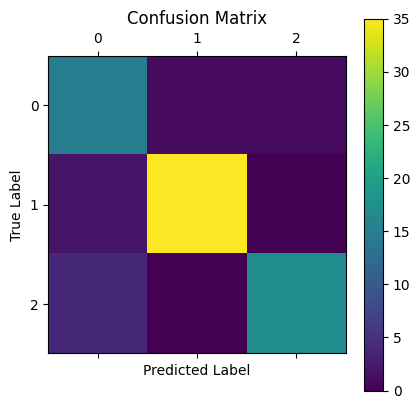

ValueError: y should be a 1d array, got an array of shape () instead.

In [10]:
import pandas as panda

# Label encoding
from sklearn.preprocessing import LabelEncoder

# Sklearn Navie Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Matplotlib
import matplotlib.pyplot as plt

# Read the data from the csv file
data = panda.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Structuring categorical data into numerical data with label encoding
label_encoder = LabelEncoder()

# Convert the categorical data into numerical data
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])

# Function to split the 'Blood Pressure' values into 'bp_high' and 'bp_low'
def split_blood_pressure(blood_pressure):
    bp_high, bp_low = map(int, blood_pressure.split('/'))
    return bp_high, bp_low

# Applying the function to the 'Blood Pressure' column and storing the results in new columns
data['bp_high'], data['bp_low'] = zip(*map(split_blood_pressure, data['Blood Pressure']))

# Removing the original 'Blood Pressure' column
del data['Blood Pressure']

# Print the data
# print(data.head())

# Training the model ...
# Split the data into training and testing data. X is the input data and y is the output data

X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Gaussian Naive Bayes Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", model.score(X_test, y_test))

# Plot the confusion matrix
plt.matshow(confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# A Function to take input from the user and return the structured data
def get_input():
    gender = input("Enter gender (Male/Female): ")
    age = input("Enter age: ")
    occupation = input("Enter occupation: ")
    sleep_duration = input("Enter sleep duration: ")
    quality_of_sleep = input("Enter quality of sleep: ")
    physical_activity = input("Enter physical activity: ")
    stress_level = input("Enter stress level: ")
    bmi_category = input("Enter BMI category: ")
    blood_pressure = input("Enter blood pressure: ")
    heart_rate = input("Enter heart rate: ")
    daily_steps = input("Enter daily steps: ")

    # here gender, occupation, bmi_category are categorical data so we need to convert them into numerical data
    # we will use one hot encoding for this with label encoding
    gender_encoded = label_encoder.transform([gender])[0]
    occupation_encoded = label_encoder.transform([occupation])[0]
    bmi_category_encoded = label_encoder.transform([bmi_category])[0]

    return [
        gender_encoded,
        age,
        occupation_encoded,
        sleep_duration,
        quality_of_sleep,
        physical_activity,
        stress_level,
        bmi_category_encoded,
        blood_pressure,
        heart_rate,
        daily_steps
    ]

# Predict the sleep health of the user
# Get the input from the user
input_data = get_input()

# Predict the sleep health of the user
prediction = model.predict([input_data])

# Print the prediction
print("Sleep Health:", label_encoder.inverse_transform(prediction[0]))

